In [11]:
from module import getMostRecent, getHeader

from astropy.io import fits

import sunpy

import numpy as np

import matplotlib.pyplot as plt

In [12]:
pixel_range=20

In [13]:
directory = 'Z:/data/CLIMSO/2024/data_calibrated'

file = getMostRecent(directory, '_c1_')

with fits.open(file) as hdul:
    
    hdul[0].header['rsun_obs']=hdul[0].header['rsun_obs']+pixel_range
    
    header = getHeader(hdul[0])
        
    hdul[0].data = np.flip(hdul[0].data, axis=0)
        
    map = sunpy.map.Map(hdul[0].data, header)

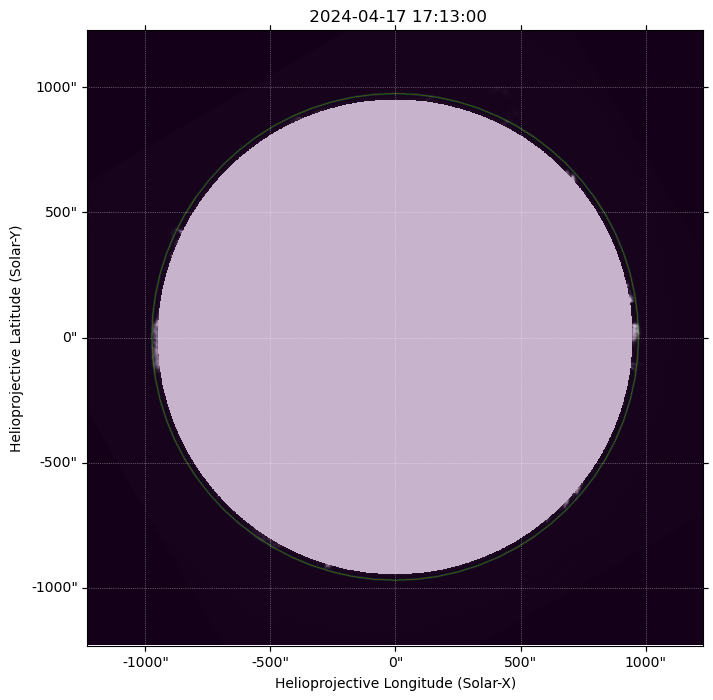

In [14]:
import cv2 as cv
import numpy as np

image=np.zeros(map.data.shape)
cv.circle(image, (1024,1024), int(map.meta['rsun_obs']), (255,255,255), 3)

mask = np.zeros(map.data.shape, dtype=np.uint8)
cv.circle(mask, (int(map.meta['crpix1']), int(map.meta['crpix2'])), int(map.meta['rsun_obs']-pixel_range), 1, thickness=-1)

data=np.array(map.data).astype(np.float64)
data[mask==1]=np.nan

map = sunpy.map.Map(data, map.meta)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=map)
map.plot()
plt.imshow(image, alpha=0.3);

In [15]:
from sunpy.map.header_helper import make_heliographic_header

carr_header = make_heliographic_header(map.date, map.observer_coordinate, map.data.shape, frame='carrington')

outmap = map.reproject_to(carr_header)

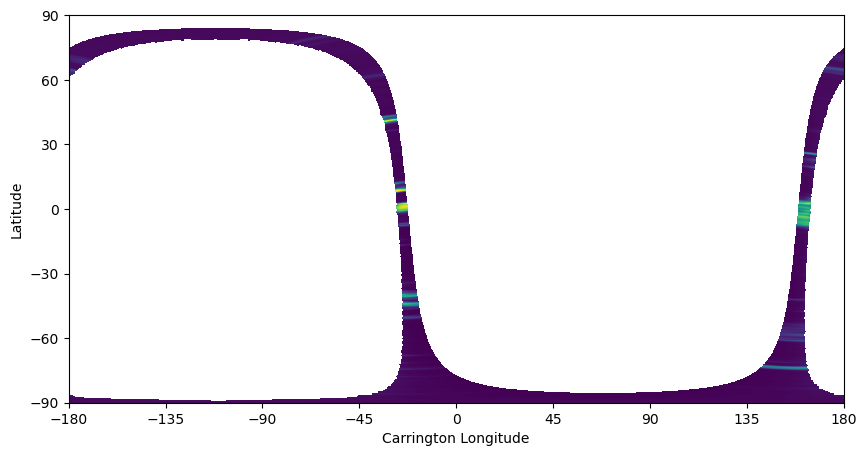

In [16]:
fig = plt.figure(figsize=(10,10))
plt.imshow(outmap.data,origin='lower', extent=[-180,180,-90,90]);

plt.xticks(np.arange(-180, 181, 45))
plt.yticks(np.arange(-90, 91, 30))

plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');